In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

from matplotlib import pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [3]:
import statsmodels.formula.api as smf

In [4]:
from statsmodels.tools import eval_measures

In [5]:
import seaborn as sns

In [6]:
file_one = "DengAI_Predicting_Disease_Spread_-_Training_Data_Features.csv"
file_two = "DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv"

# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
df = pd.read_csv(file_one, encoding="ISO-8859-1")
df2 =  pd.read_csv(file_two, encoding="ISO-8859-1")

In [7]:
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [8]:
df2.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         1456 non-null   object
 1   year         1456 non-null   int64 
 2   weekofyear   1456 non-null   int64 
 3   total_cases  1456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 45.6+ KB


In [10]:
m_df = pd.merge(df, df2, on=['city','year','weekofyear'], how="outer")
m_df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [11]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [12]:
m_df['week_start_date'] = pd.to_datetime(m_df['week_start_date'])

In [13]:
m_df.duplicated().value_counts()

False    1456
dtype: int64

In [14]:
#m_df.iloc[[971]]

In [15]:
### check for duplicate rows, if any
#df_dup = m_df[m_df.duplicated()]
#df_dup

In [16]:
### remove duplicates if necessary
#df_clean = m_df.drop_duplicates(keep='first')
#df_clean.info()

# Explatory Data Analysis (EDA) on Dengue Cases in San Juan 

In [17]:
sj = m_df.loc[m_df['city'] == 'sj',:]
sj.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [18]:
#sj.info()

In [19]:
### Checking the histogram for feature with most missing values
##sj['ndvi_ne'].hist()

In [20]:
## quick browse to the columns with missing values
##sj[sj.isna().any(axis=1)]

### Replacing all NaN with the average of the values (in that column), in the same week, of all other years

In [21]:
#import math
#x = float('nan')
#math.isnan(x)
for i in range(sj.shape[0]): #iterate over rows
    for j in range(sj.shape[1]): #iterate over columns
       # if sj_23.iloc[i, j].isnull(): #get cell value
        if pd.isnull(sj.iloc[i,j]):
        #if value.isnull():
        #if math.isnan(value):
            sj.iloc[i,j] = sj.iloc[:,j].mean()
            #sj.iloc[i,j] = sj.iloc[(['weekofyear'][i]),j].mean()
             #sj.iloc[i,j] = sj.iloc[:,j].mean()
            #print('NaN')
sj.head()

/Users/jam/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [22]:
#sj.info()

In [23]:
#sj.head(60)

In [24]:
### checking to see is all NaN vlaues were replaced.
#sj[sj.isna().any(axis=1)]

In [25]:
#sj['ndvi_ne'].hist()

In [26]:
#plt.scatter(sj.week_start_date.loc[sj['year'] == check] ,sj.reanalysis_relative_humidity_percent.loc[sj['year'] == check])

In [27]:
#sj['roll_humid'] = sj.reanalysis_relative_humidity_percent.rolling(6).mean()

In [28]:
#plt.scatter(sj.index , sj.roll_avg)

#plt.scatter(sj.week_start_date.loc[sj['year'] == check] , sj.roll_humid.loc[sj['year'] == check])

In [29]:
#plt.scatter(sj.week_start_date.loc[sj['year'] == check] , sj.total_cases.loc[sj['year'] == check])

## Grouping dataframe by year and week of year to apply rolling averages

In [30]:
sj_week = sj.groupby('weekofyear').mean()
sj_week.head()

,year,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
weekofyear,,,,,,,,,,,,,,,,,,,,,
1,1999.5,0.047913,0.021544,0.168713,0.150328,17.530135,298.329022,298.423931,294.107380,300.349803,...,77.629697,17.530135,15.522386,2.220965,25.616961,6.366705,29.856882,21.372330,24.914247,32.500000
2,1999.5,0.048495,0.068688,0.211703,0.171361,24.845556,298.068889,298.182540,293.779921,299.961111,...,77.258175,24.845556,15.169603,2.215873,25.205556,6.448413,29.188889,21.122222,27.427778,32.777778
3,1999.5,0.021312,0.059424,0.200639,0.187718,24.415556,297.707063,297.833730,293.613571,299.938889,...,78.191270,24.415556,15.031587,2.357937,24.948413,6.539683,29.466667,20.566667,29.905556,31.611111
4,1999.5,0.076874,0.043329,0.176935,0.176804,9.096667,297.686349,297.882143,293.295556,299.827778,...,76.766587,9.096667,14.748333,2.432540,24.900794,6.556349,29.161111,20.438889,18.600000,27.444444
5,1999.5,0.074718,0.059267,0.183896,0.170251,9.640000,297.561746,297.698810,293.068571,299.916667,...,76.287698,9.640000,14.528492,2.403968,25.029365,6.587302,29.638889,20.311111,17.588889,26.222222


In [31]:
#sj_week.info()

In [32]:
sj_week['year'] = np.floor(sj_week['year'])
sj_week['year'] = sj_week['year'].astype(int)
sj_week.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 1 to 53
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   year                                   53 non-null     int64  
 1   ndvi_ne                                53 non-null     float64
 2   ndvi_nw                                53 non-null     float64
 3   ndvi_se                                53 non-null     float64
 4   ndvi_sw                                53 non-null     float64
 5   precipitation_amt_mm                   53 non-null     float64
 6   reanalysis_air_temp_k                  53 non-null     float64
 7   reanalysis_avg_temp_k                  53 non-null     float64
 8   reanalysis_dew_point_temp_k            53 non-null     float64
 9   reanalysis_max_air_temp_k              53 non-null     float64
 10  reanalysis_min_air_temp_k              53 non-null     float64
 11  reanalys

In [33]:
#sj_week.head()

### Checking for Seasonality! Average Temp, Humidity, Precipitation, and Total Cases over the 52 Weeks of Year (all years in the training set)

In [34]:
#plt.scatter(sj_week.index , sj_week.reanalysis_relative_humidity_percent)

In [35]:
#plt.scatter(sj_week.index, sj_week.reanalysis_sat_precip_amt_mm)

### Average Total Cases per week, plus Rolling Average for temperature, Humidity, and Percipitation

In [36]:
plt.rcParams["figure.figsize"] = (10,5)

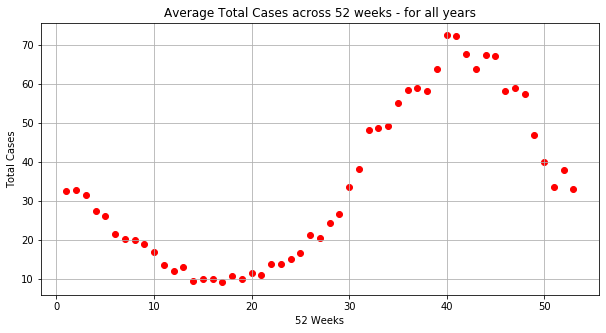

In [78]:
plt.scatter(sj_week.index, sj_week.total_cases, c='red')
plt.grid()
plt.xlabel('52 Weeks')
plt.ylabel('Total Cases')
plt.title('Average Total Cases across 52 weeks - for all years')
plt.savefig("plots/sj_cases.png")

In [38]:
sj_week['roll_temp'] = sj_week.station_avg_temp_c.rolling(6).mean()

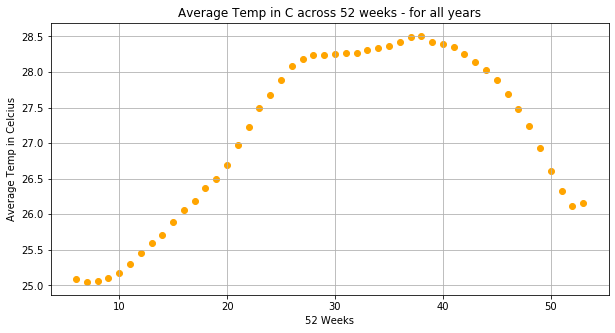

In [79]:
plt.scatter(sj_week.index, sj_week.roll_temp, c='orange')
plt.grid()
plt.xlabel('52 Weeks')
plt.ylabel('Average Temp in Celcius')
plt.title('Average Temp in C across 52 weeks - for all years')
plt.savefig("plots/sj_temp.png")

In [40]:
sj_week['roll_humid'] = sj_week.reanalysis_relative_humidity_percent.rolling(6).mean()

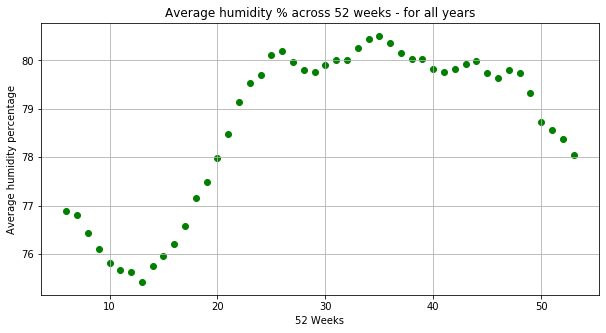

In [80]:
plt.scatter(sj_week.index , sj_week.roll_humid, c='green')
plt.grid()
plt.xlabel('52 Weeks')
plt.ylabel('Average humidity percentage')
plt.title('Average humidity % across 52 weeks - for all years')
plt.savefig("plots/sj_humidity.png")

In [46]:
sj_week['roll_prec'] = sj_week.reanalysis_sat_precip_amt_mm.rolling(6).mean()

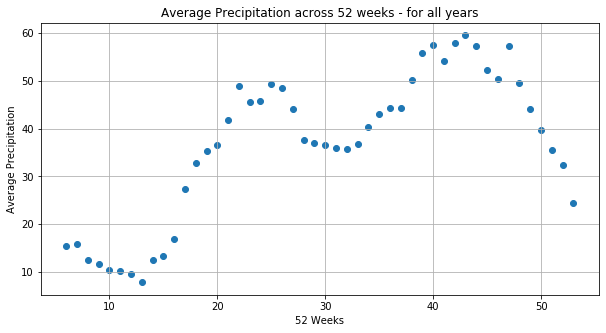

In [81]:
plt.scatter(sj_week.index, sj_week.roll_prec)
plt.grid()
plt.xlabel('52 Weeks')
plt.ylabel('Average Precipitation')
plt.title('Average Precipitation across 52 weeks - for all years')
plt.savefig("plots/sj_precipitation.png")

In [48]:
sj_week['roll_dew'] = sj_week.reanalysis_dew_point_temp_k.rolling(6).mean()

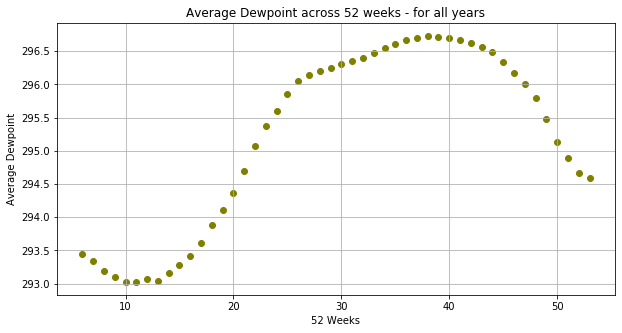

In [82]:
plt.scatter(sj_week.index, sj_week.roll_dew, c='olive')
plt.grid()
plt.xlabel('52 Weeks')
plt.ylabel('Average Dewpoint')
plt.title('Average Dewpoint across 52 weeks - for all years')
plt.savefig("plots/sj_dewpoint.png")

## Creating features based on rolling averages of Temp & Humidity that impact increase and decrease in total cases.

In [130]:
sj['roll_temp'] = sj.station_avg_temp_c.rolling(6).mean()
sj['roll_humid'] = sj.reanalysis_relative_humidity_percent.rolling(6).mean()
sj['roll_prec'] = sj.reanalysis_sat_precip_amt_mm.rolling(6).mean()
sj['roll_se'] = sj.ndvi_se.rolling(6).mean()
sj['roll_sw'] = sj.ndvi_sw.rolling(6).mean()
sj['roll_dew'] = sj.reanalysis_dew_point_temp_k.rolling(6).mean()
sj['roll_max_temp'] = sj.station_max_temp_c.rolling(6).mean() 
sj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 935
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   city                                   936 non-null    object        
 1   year                                   936 non-null    int64         
 2   weekofyear                             936 non-null    int64         
 3   week_start_date                        936 non-null    datetime64[ns]
 4   ndvi_ne                                936 non-null    float64       
 5   ndvi_nw                                936 non-null    float64       
 6   ndvi_se                                936 non-null    float64       
 7   ndvi_sw                                936 non-null    float64       
 8   precipitation_amt_mm                   936 non-null    float64       
 9   reanalysis_air_temp_k                  936 non-null    float64   

/Users/jam/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/jam/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jam/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

## Cause & Effect! Feature Engineering

In [131]:
### Cross referencing current with previous features as dependent features
sj['prev_temp_27'] = sj['roll_temp'].shift(27)
sj['prev_temp_23'] = sj['roll_temp'].shift(23)
sj['prev_temp_20'] = sj['roll_temp'].shift(20)
sj['prev_temp_17'] = sj['roll_temp'].shift(17)
sj['prev_temp_14'] = sj['roll_temp'].shift(14)
sj['prev_temp_11'] = sj['roll_temp'].shift(11)
sj['prev_temp_8'] = sj['roll_temp'].shift(8)
sj['prev_temp_5'] = sj['roll_temp'].shift(5)
sj['prev_temp_2'] = sj['roll_temp'].shift(2)
sj['prev_humid_27'] = sj['roll_humid'].shift(27)
sj['prev_humid_23'] = sj['roll_humid'].shift(23)
sj['prev_humid_20'] = sj['roll_humid'].shift(20)
sj['prev_humid_17'] = sj['roll_humid'].shift(17)
sj['prev_humid_14'] = sj['roll_humid'].shift(14)
sj['prev_humid_11'] = sj['roll_humid'].shift(11)
sj['prev_humid_8'] = sj['roll_humid'].shift(8)
sj['prev_humid_5'] = sj['roll_humid'].shift(5)
sj['prev_humid_2'] = sj['roll_humid'].shift(2)
sj['prev_prec_27'] = sj['roll_prec'].shift(27)
sj['prev_prec_23'] = sj['roll_prec'].shift(23)
sj['prev_prec_20'] = sj['roll_prec'].shift(20)
sj['prev_prec_17'] = sj['roll_prec'].shift(17)
sj['prev_prec_14'] = sj['roll_prec'].shift(14)
sj['prev_prec_11'] = sj['roll_prec'].shift(11)
sj['prev_prec_8'] = sj['roll_prec'].shift(8)
sj['prev_prec_5'] = sj['roll_prec'].shift(5)
sj['prev_prec_2'] = sj['roll_prec'].shift(2)
sj['prev_dew_27'] = sj['roll_dew'].shift(27)
sj['prev_dew_23'] = sj['roll_dew'].shift(23)
sj['prev_dew_20'] = sj['roll_dew'].shift(20)
sj['prev_dew_17'] = sj['roll_dew'].shift(17)
sj['prev_dew_14'] = sj['roll_dew'].shift(14)
sj['prev_dew_11'] = sj['roll_dew'].shift(11)
sj['prev_dew_8'] = sj['roll_dew'].shift(8)
sj['prev_dew_5'] = sj['roll_dew'].shift(5)
sj['prev_dew_2'] = sj['roll_dew'].shift(2)
sj['prev_maxt_27'] = sj['roll_max_temp'].shift(27)
sj['prev_maxt_23'] = sj['roll_max_temp'].shift(23)
sj['prev_maxt_20'] = sj['roll_max_temp'].shift(20)
sj['prev_maxt_17'] = sj['roll_max_temp'].shift(17)
sj['prev_maxt_14'] = sj['roll_max_temp'].shift(14)
sj['prev_maxt_11'] = sj['roll_max_temp'].shift(11)
sj['prev_maxt_8'] = sj['roll_max_temp'].shift(8)
sj['prev_maxt_5'] = sj['roll_max_temp'].shift(5)
sj['prev_maxt_2'] = sj['roll_max_temp'].shift(2)

/Users/jam/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jam/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jam/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [132]:
sj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 935
Data columns (total 77 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   city                                   936 non-null    object        
 1   year                                   936 non-null    int64         
 2   weekofyear                             936 non-null    int64         
 3   week_start_date                        936 non-null    datetime64[ns]
 4   ndvi_ne                                936 non-null    float64       
 5   ndvi_nw                                936 non-null    float64       
 6   ndvi_se                                936 non-null    float64       
 7   ndvi_sw                                936 non-null    float64       
 8   precipitation_amt_mm                   936 non-null    float64       
 9   reanalysis_air_temp_k                  936 non-null    float64   

In [133]:
### filling the NaN of NEW engineered feature with averages of respective column(s)
for i in range(sj.shape[0]): #iterate over rows
    for j in range(sj.shape[1]): #iterate over columns
        if pd.isnull(sj.iloc[i,j]):
            sj.iloc[i,j] = sj.iloc[:,j].mean()
sj.head()

/Users/jam/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,prev_dew_2,prev_maxt_27,prev_maxt_23,prev_maxt_20,prev_maxt_17,prev_maxt_14,prev_maxt_11,prev_maxt_8,prev_maxt_5,prev_maxt_2
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,295.123001,31.668729,31.672483,31.670726,31.664403,31.655068,31.644309,31.632627,31.622388,31.615247
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,295.123001,31.668729,31.672483,31.670726,31.664403,31.655068,31.644309,31.632627,31.622388,31.615247
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,295.123001,31.668729,31.672483,31.670726,31.664403,31.655068,31.644309,31.632627,31.622388,31.615247
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,295.123001,31.668729,31.672483,31.670726,31.664403,31.655068,31.644309,31.632627,31.622388,31.615247
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,295.123001,31.668729,31.672483,31.670726,31.664403,31.655068,31.644309,31.632627,31.622388,31.615247


## Defining the Training Data for San Juan

In [137]:
sj_train = sj[['year','weekofyear', 'prev_temp_27','prev_temp_23','prev_temp_20', 'prev_temp_17','prev_temp_14',
               'prev_temp_11', 'prev_temp_8','prev_temp_5', 'prev_temp_2', 'roll_temp', 
               'prev_humid_27','prev_humid_23','prev_humid_20', 'prev_humid_17','prev_humid_14', 'prev_humid_11', 
               'prev_humid_8','prev_humid_5','prev_humid_2', 'roll_humid', 
               'prev_prec_27','prev_prec_23', 'prev_prec_20','prev_prec_17','prev_prec_14', 'prev_prec_11', 
               'prev_prec_8', 'prev_prec_5', 'prev_prec_2', 'roll_prec', 
               'prev_dew_23', 'prev_dew_20','prev_dew_17', 'prev_dew_14', 'prev_dew_11','prev_dew_8', 
               'prev_dew_5','prev_dew_2', 'roll_dew', 
               'prev_maxt_27', 'prev_maxt_23','prev_maxt_20','prev_maxt_17','prev_maxt_14',
               'prev_maxt_11', 'prev_maxt_8','prev_maxt_5', 'prev_maxt_2','roll_max_temp',
               'total_cases']]
sj_train

,year,weekofyear,prev_temp_27,prev_temp_23,prev_temp_20,prev_temp_17,prev_temp_14,prev_temp_11,prev_temp_8,prev_temp_5,...,prev_maxt_23,prev_maxt_20,prev_maxt_17,prev_maxt_14,prev_maxt_11,prev_maxt_8,prev_maxt_5,prev_maxt_2,roll_max_temp,total_cases
0,1990,18,27.047884,27.051645,27.051075,27.047657,27.041955,27.034678,27.026749,27.019738,...,31.672483,31.670726,31.664403,31.655068,31.644309,31.632627,31.622388,31.615247,31.611670,4
1,1990,19,27.047884,27.051645,27.051075,27.047657,27.041955,27.034678,27.026749,27.019738,...,31.672483,31.670726,31.664403,31.655068,31.644309,31.632627,31.622388,31.615247,31.611670,5
2,1990,20,27.047884,27.051645,27.051075,27.047657,27.041955,27.034678,27.026749,27.019738,...,31.672483,31.670726,31.664403,31.655068,31.644309,31.632627,31.622388,31.615247,31.611670,4
3,1990,21,27.047884,27.051645,27.051075,27.047657,27.041955,27.034678,27.026749,27.019738,...,31.672483,31.670726,31.664403,31.655068,31.644309,31.632627,31.622388,31.615247,31.611670,3
4,1990,22,27.047884,27.051645,27.051075,27.047657,27.041955,27.034678,27.026749,27.019738,...,31.672483,31.670726,31.664403,31.655068,31.644309,31.632627,31.622388,31.615247,31.611670,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,2008,13,28.452381,28.426190,27.802381,26.792857,25.973810,25.357143,24.830952,24.573810,...,33.150000,32.500000,31.016667,29.716667,28.866667,28.416667,28.050000,28.316667,29.066667,4
932,2008,14,28.416667,28.273810,27.607143,26.440476,25.685714,25.121429,24.685714,24.626190,...,32.866667,32.216667,30.550000,29.250000,28.600000,28.233333,28.050000,28.783333,29.450000,3
933,2008,15,28.338095,27.923810,27.402381,26.369048,25.435714,24.914286,24.585714,24.723810,...,32.500000,31.850000,30.266667,28.966667,28.416667,28.050000,28.316667,29.066667,29.716667,1
934,2008,16,28.295238,27.802381,26.792857,25.973810,25.357143,24.830952,24.573810,24.850000,...,32.500000,31.016667,29.716667,28.866667,28.416667,28.050000,28.316667,29.450000,29.716667,3


In [138]:
## Re-indexing the dataframe
sj_train.set_index(['year','weekofyear'], inplace = True)
sj_train.head()

prev_temp_27  prev_temp_23  prev_temp_20  prev_temp_17  \
year weekofyear                                                           
1990 18             27.047884     27.051645     27.051075     27.047657   
     19             27.047884     27.051645     27.051075     27.047657   
     20             27.047884     27.051645     27.051075     27.047657   
     21             27.047884     27.051645     27.051075     27.047657   
     22             27.047884     27.051645     27.051075     27.047657   

                 prev_temp_14  prev_temp_11  prev_temp_8  prev_temp_5  \
year weekofyear                                                         
1990 18             27.041955     27.034678    27.026749    27.019738   
     19             27.041955     27.034678    27.026749    27.019738   
     20             27.041955     27.034678    27.026749    27.019738   
     21             27.041955     27.034678    27.026749    27.019738   
     22             27.041955     27.034678    27.026749    27.019738   

                 prev_temp_2  roll_temp  ...  prev_maxt_23  prev_maxt_20  \
year weekofyear                          ...                               
1990 18             27.01392  27.010663  ...     31.672483     31.670726   
     19             27.01392  27.010663  ...     31.672483     31.670726   
     20             27.01392  27.010663  ...     31.672483     31.670726   
     21             27.01392  27.010663  ...     31.672483     31.670726   
     22             27.01392  27.010663  ...     31.672483     31.670726   

                 prev_maxt_17  prev_maxt_14  prev_maxt_11  prev_maxt_8  \
year weekofyear                                                          
1990 18             31.664403     31.655068     31.644309    31.632627   
     19             31.664403     31.655068     31.644309    31.632627   
     20             31.664403     31.655068     31.644309    31.632627   
     21             31.664403     31.655068     31.644309    31.632627   
     22             31.664403     31.655068     31.644309    31.632627   

                 prev_maxt_5  prev_maxt_2  roll_max_temp  total_cases  
year weekofyear                                                        
1990 18            31.622388    31.615247       31.61167            4  
     19            31.622388    31.615247       31.61167            5  
     20            31.622388    31.615247       31.61167            4  
     21            31.622388    31.615247       31.61167            3  
     22            31.622388    31.615247       31.61167            6  

[5 rows x 50 columns]

In [243]:
#import seaborn as sns

In [145]:
#sns.pairplot(sj_train)

# Explatory Data Analysis (EDA) on Dengue Cases in Iquitos 

In [52]:
iq = m_df.loc[m_df['city'] == 'iq',:]
iq.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0


In [53]:
#iq.info()

In [54]:
#iq['station_avg_temp_c'].hist()

In [55]:
#iq['station_diur_temp_rng_c'].hist()

In [56]:
## quick browse to the columns with missing values
##iq[iq.isna().any(axis=1)]

In [57]:
for i in range(iq.shape[0]): #iterate over rows
    for j in range(iq.shape[1]): #iterate over columns
        if pd.isnull(iq.iloc[i,j]):
            iq.iloc[i,j] = iq.iloc[:,j].mean()
            #sj.iloc[i,j] = sj.iloc[(['weekofyear'][i]),j].mean()
iq.head()

/Users/jam/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0


In [58]:
##iq[iq.isna().any(axis=1)]

In [59]:
#iq['station_avg_temp_c'].hist()

In [60]:
#iq['station_diur_temp_rng_c'].hist()

## Grouping dataframe by year and week of year to apply rolling averages

In [61]:
iq_week = iq.groupby('weekofyear').mean()
iq_week.head()

,year,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
weekofyear,,,,,,,,,,,,,,,,,,,,,
1,2005.5,0.238823,0.215747,0.240763,0.223386,54.098147,298.303193,299.485894,295.521453,307.15655,...,86.991823,54.098147,17.136222,9.471357,27.830113,10.302359,33.960909,21.709336,70.536905,9.3
2,2005.5,0.289377,0.260149,0.269627,0.303029,65.130000,297.879286,299.180000,295.945857,306.68000,...,90.671857,65.130000,17.553286,8.271429,27.623833,9.985000,33.860000,21.880000,79.850000,13.8
3,2005.5,0.246766,0.209562,0.237119,0.255085,75.971000,298.247714,299.617857,296.176714,306.83000,...,89.900571,75.971000,17.793857,8.618571,28.030260,10.532286,34.140000,21.970000,91.520000,10.8
4,2005.5,0.232678,0.224632,0.204731,0.252618,77.209000,297.888429,299.026429,295.827714,305.97000,...,89.932714,77.209000,17.412714,7.921429,27.755427,10.515620,33.860000,21.830000,89.640000,15.8
5,2005.5,0.240495,0.221476,0.224639,0.242735,66.896000,298.156286,299.417143,295.808571,306.31000,...,89.030286,66.896000,17.434429,8.520000,27.705593,10.489953,34.090000,21.750000,71.020000,14.8


In [62]:
iq_week['year'] = np.floor(iq_week['year'])
iq_week['year'] = iq_week['year'].astype(int)
#iq_week.info()

## Average Total Cases per week, plus Rolling Average for temperature, Humidity, and Percipitation

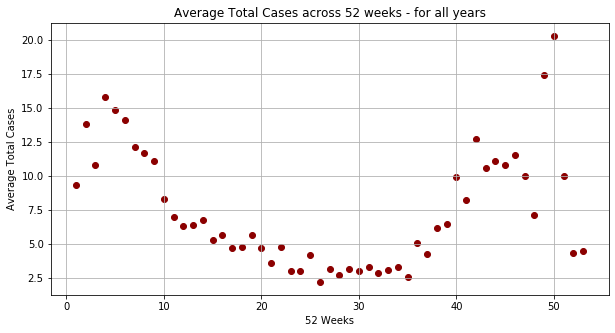

In [87]:
plt.scatter(iq_week.index, iq_week.total_cases, c='darkred')
plt.grid()
plt.xlabel('52 Weeks')
plt.ylabel('Average Total Cases')
plt.title('Average Total Cases across 52 weeks - for all years')
plt.savefig("plots/iq_cases.png")

In [88]:
iq_week['roll_temp'] = iq_week.station_avg_temp_c.rolling(6).mean()

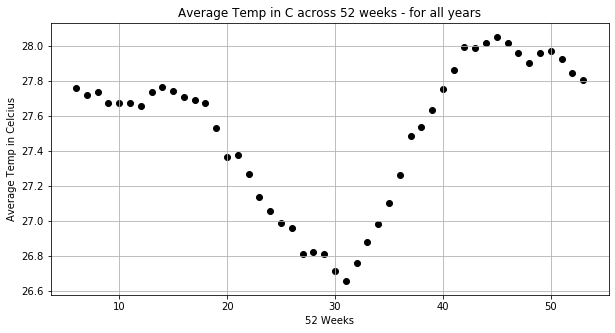

In [89]:
plt.scatter(iq_week.index, iq_week.roll_temp, c='black')
plt.grid()
plt.xlabel('52 Weeks')
plt.ylabel('Average Temp in Celcius')
plt.title('Average Temp in C across 52 weeks - for all years')
plt.savefig("plots/iq_temp.png")

In [70]:
iq_week[ 'roll_humid' ] = iq_week.reanalysis_relative_humidity_percent.rolling(6).mean()

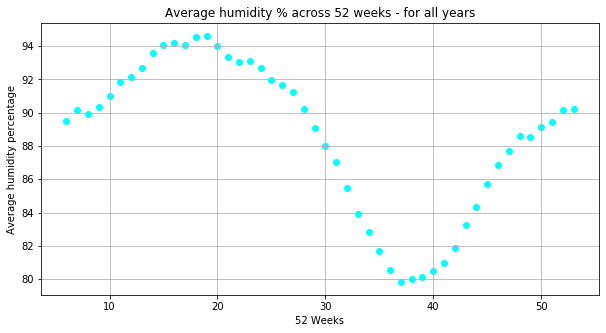

In [84]:
plt.scatter(iq_week.index , iq_week.roll_humid, c='cyan')
plt.grid()
plt.xlabel('52 Weeks')
plt.ylabel('Average humidity percentage')
plt.title('Average humidity % across 52 weeks - for all years')
plt.savefig("plots/iq_humidity.png")

In [72]:
iq_week[ 'roll_prec' ] = iq_week.reanalysis_sat_precip_amt_mm.rolling(6).mean()

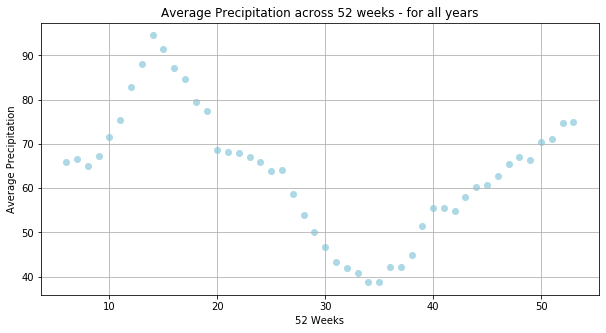

In [85]:
plt.scatter(iq_week.index, iq_week.roll_prec, c = 'lightblue')
plt.grid()
plt.xlabel('52 Weeks')
plt.ylabel('Average Precipitation')
plt.title('Average Precipitation across 52 weeks - for all years')
plt.savefig("plots/iq_precipitation.png")

In [74]:
iq_week['roll_dew'] = iq_week.reanalysis_dew_point_temp_k.rolling(6).mean()

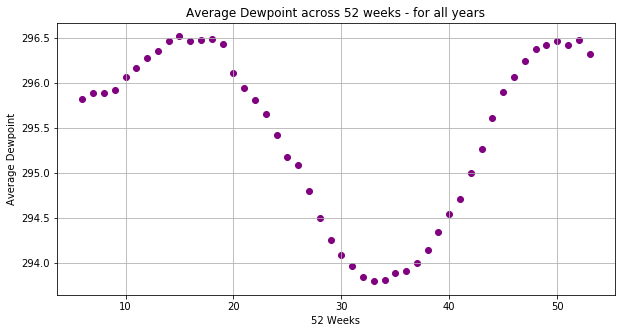

In [86]:
plt.scatter(iq_week.index, iq_week.roll_dew, c= 'purple')
plt.grid()
plt.xlabel('52 Weeks')
plt.ylabel('Average Dewpoint')
plt.title('Average Dewpoint across 52 weeks - for all years')
plt.savefig("plots/iq_dewpoint.png")

## Creating features based on rolling averages of Temp & Humidity that impact increase and decrease in total cases.

In [153]:
iq['roll_temp'] = iq.station_avg_temp_c.rolling(3).mean()
iq['roll_prec'] = iq.reanalysis_relative_humidity_percent.rolling(3).mean()
iq['roll_humid'] = iq.reanalysis_relative_humidity_percent.rolling(3).mean()
iq['roll_dew'] = iq.reanalysis_dew_point_temp_k.rolling(3).mean()
iq['roll_min_temp'] = iq.station_min_temp_c.rolling(3).mean()
iq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 936 to 1455
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   city                                   520 non-null    object        
 1   year                                   520 non-null    int64         
 2   weekofyear                             520 non-null    int64         
 3   week_start_date                        520 non-null    datetime64[ns]
 4   ndvi_ne                                520 non-null    float64       
 5   ndvi_nw                                520 non-null    float64       
 6   ndvi_se                                520 non-null    float64       
 7   ndvi_sw                                520 non-null    float64       
 8   precipitation_amt_mm                   520 non-null    float64       
 9   reanalysis_air_temp_k                  520 non-null    float64

/Users/jam/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/jam/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jam/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [154]:
for i in range(iq.shape[0]): #iterate over rows
    for j in range(iq.shape[1]): #iterate over columns
        if pd.isnull(iq.iloc[i,j]):
            iq.iloc[i,j] = iq.iloc[:,j].mean()
            #sj.iloc[i,j] = sj.iloc[(['weekofyear'][i]),j].mean()
iq.head()

/Users/jam/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,roll_temp,roll_prec,roll_humid,roll_dew,roll_min_temp
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,10.775000,32.5,20.7,3.0,0,27.534216,88.626627,88.626627,295.493170,21.196409
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,11.566667,34.0,20.8,55.6,0,27.534216,88.626627,88.626627,295.493170,21.196409
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,11.466667,33.0,20.7,38.1,0,26.700000,93.949524,93.949524,295.388571,20.733333
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,10.533333,31.5,14.7,30.0,0,26.488889,92.221429,92.221429,294.592857,18.733333
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,11.480000,33.3,19.1,4.0,0,26.388889,90.414762,90.414762,294.125714,18.166667


In [211]:

##iq.info()

In [155]:
iq['prev_temp_1'] = iq['roll_temp'].shift(1)
iq['prev_prec_1'] = iq['roll_prec'].shift(1)
iq['prev_humid_1'] = iq['roll_humid'].shift(1)
iq['prev_dew_1'] = iq['roll_dew'].shift(1)
iq['prev_temp_2'] = iq['roll_temp'].shift(2)
iq['prev_prec_2'] = iq['roll_prec'].shift(2)
iq['prev_humid_2'] = iq['roll_humid'].shift(2)
iq['prev_dew_2'] = iq['roll_dew'].shift(2)
iq['prev_temp_4'] = iq['roll_temp'].shift(4)
iq['prev_prec_4'] = iq['roll_prec'].shift(4)
iq['prev_humid_4'] = iq['roll_humid'].shift(4)
iq['prev_dew_4'] = iq['roll_dew'].shift(4)
iq['prev_temp_6'] = iq['roll_temp'].shift(6)
iq['prev_prec_6'] = iq['roll_prec'].shift(6)
iq['prev_humid_6'] = iq['roll_humid'].shift(6)
iq['prev_dew_6'] = iq['roll_dew'].shift(6)
iq['prev_temp_8'] = iq['roll_temp'].shift(8)
iq['prev_prec_8'] = iq['roll_prec'].shift(8)
iq['prev_humid_8'] = iq['roll_humid'].shift(8)
iq['prev_dew_8'] = iq['roll_dew'].shift(8)


/Users/jam/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/jam/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jam/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [57]:
##iq.info()

In [156]:
for i in range(iq.shape[0]): #iterate over rows
    for j in range(iq.shape[1]): #iterate over columns
        if pd.isnull(iq.iloc[i,j]):
            iq.iloc[i,j] = iq.iloc[:,j].mean()
            #sj.iloc[i,j] = sj.iloc[(['weekofyear'][i]),j].mean()
iq.head()

/Users/jam/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,prev_humid_4,prev_dew_4,prev_temp_6,prev_prec_6,prev_humid_6,prev_dew_6,prev_temp_8,prev_prec_8,prev_humid_8,prev_dew_8
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,88.607858,295.491051,27.544964,88.6035,88.6035,295.490541,27.543089,88.583604,88.583604,295.485097
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,88.607858,295.491051,27.544964,88.6035,88.6035,295.490541,27.543089,88.583604,88.583604,295.485097
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,88.607858,295.491051,27.544964,88.6035,88.6035,295.490541,27.543089,88.583604,88.583604,295.485097
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,88.607858,295.491051,27.544964,88.6035,88.6035,295.490541,27.543089,88.583604,88.583604,295.485097
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,88.626627,295.493170,27.544964,88.6035,88.6035,295.490541,27.543089,88.583604,88.583604,295.485097


In [157]:
iq_train = iq[['year','weekofyear',
               'prev_temp_6', 'prev_temp_4','prev_temp_2', 'prev_temp_1',
               'roll_temp',
               'prev_prec_8','prev_prec_6','prev_prec_4', 'prev_prec_2', 'prev_prec_1',
               'roll_prec',
               'prev_humid_6', 'prev_humid_4', 'prev_humid_2', 'prev_humid_1',
               'roll_humid',
               'prev_dew_8', 'prev_dew_6', 'prev_dew_4', 'prev_dew_2', 'prev_dew_1',
               'roll_dew',
               'roll_min_temp',
               'total_cases']]
iq_train.head()

,year,weekofyear,prev_temp_6,prev_temp_4,prev_temp_2,prev_temp_1,roll_temp,prev_prec_8,prev_prec_6,prev_prec_4,...,prev_humid_1,roll_humid,prev_dew_8,prev_dew_6,prev_dew_4,prev_dew_2,prev_dew_1,roll_dew,roll_min_temp,total_cases
936,2000,26,27.544964,27.543046,27.541057,27.537616,27.534216,88.583604,88.6035,88.607858,...,88.618828,88.626627,295.485097,295.490541,295.491051,295.492557,295.493071,295.493170,21.196409,0
937,2000,27,27.544964,27.543046,27.541057,27.534216,27.534216,88.583604,88.6035,88.607858,...,88.626627,88.626627,295.485097,295.490541,295.491051,295.492557,295.493170,295.493170,21.196409,0
938,2000,28,27.544964,27.543046,27.534216,27.534216,26.700000,88.583604,88.6035,88.607858,...,88.626627,93.949524,295.485097,295.490541,295.491051,295.493170,295.493170,295.388571,20.733333,0
939,2000,29,27.544964,27.543046,27.534216,26.700000,26.488889,88.583604,88.6035,88.607858,...,93.949524,92.221429,295.485097,295.490541,295.491051,295.493170,295.388571,294.592857,18.733333,0
940,2000,30,27.544964,27.534216,26.700000,26.488889,26.388889,88.583604,88.6035,88.626627,...,92.221429,90.414762,295.485097,295.490541,295.493170,295.388571,294.592857,294.125714,18.166667,0


In [158]:
iq_train.set_index(['year','weekofyear'], inplace = True)
iq_train.head()

prev_temp_6  prev_temp_4  prev_temp_2  prev_temp_1  \
year weekofyear                                                       
2000 26            27.544964    27.543046    27.541057    27.537616   
     27            27.544964    27.543046    27.541057    27.534216   
     28            27.544964    27.543046    27.534216    27.534216   
     29            27.544964    27.543046    27.534216    26.700000   
     30            27.544964    27.534216    26.700000    26.488889   

                 roll_temp  prev_prec_8  prev_prec_6  prev_prec_4  \
year weekofyear                                                     
2000 26          27.534216    88.583604      88.6035    88.607858   
     27          27.534216    88.583604      88.6035    88.607858   
     28          26.700000    88.583604      88.6035    88.607858   
     29          26.488889    88.583604      88.6035    88.607858   
     30          26.388889    88.583604      88.6035    88.626627   

                 prev_prec_2  prev_prec_1  ...  prev_humid_1  roll_humid  \
year weekofyear                            ...                             
2000 26            88.609379    88.618828  ...     88.618828   88.626627   
     27            88.609379    88.626627  ...     88.626627   88.626627   
     28            88.626627    88.626627  ...     88.626627   93.949524   
     29            88.626627    93.949524  ...     93.949524   92.221429   
     30            93.949524    92.221429  ...     92.221429   90.414762   

                 prev_dew_8  prev_dew_6  prev_dew_4  prev_dew_2  prev_dew_1  \
year weekofyear                                                               
2000 26          295.485097  295.490541  295.491051  295.492557  295.493071   
     27          295.485097  295.490541  295.491051  295.492557  295.493170   
     28          295.485097  295.490541  295.491051  295.493170  295.493170   
     29          295.485097  295.490541  295.491051  295.493170  295.388571   
     30          295.485097  295.490541  295.493170  295.388571  294.592857   

                   roll_dew  roll_min_temp  total_cases  
year weekofyear                                          
2000 26          295.493170      21.196409            0  
     27          295.493170      21.196409            0  
     28          295.388571      20.733333            0  
     29          294.592857      18.733333            0  
     30          294.125714      18.166667            0  

[5 rows x 24 columns]

In [88]:
#sns.pairplot(sj_train)

# Mosquito Model

In [159]:
sj_train_subtrain = sj_train.head(800)
sj_train_subtest = sj_train.tail(sj_train.shape[0] - 800)

iq_train_subtrain = iq_train.head(400)
iq_train_subtest = iq_train.tail(iq_train.shape[0] - 400)

## Machine Learning model for San Juan

In [160]:
def get_best_model(train, test):
    # Step 1: specify the form of the model
    model_formula = "total_cases ~ 1 + " \
                    "prev_temp_27 + " \
                    "prev_temp_23 + " \
                    "prev_temp_17 + " \
                    "prev_temp_14 + " \
                    "prev_temp_11 + " \
                    "prev_temp_8 + " \
                    "roll_temp + " \
                    "prev_humid_27 + " \
                    "prev_humid_23 + " \
                    "prev_humid_17 + " \
                    "prev_humid_14 + " \
                    "prev_humid_11 + " \
                    "prev_humid_8 + " \
                    "roll_humid + " \
                    "prev_prec_27 + " \
                    "prev_prec_23 + " \
                    "prev_prec_17 + " \
                    "prev_prec_14 + " \
                    "prev_prec_11 + " \
                    "prev_prec_8 + " \
                    "roll_prec + " \
                    "prev_dew_20 + " \
                    "prev_dew_5 + " \
                    "prev_dew_2"
    
    grid = 10 ** np.arange(-8, -3, dtype=np.float64)
                    
    best_alpha = []
    best_score = 1000
        
    # Step 2: Find the best hyper parameter, alpha
    for alpha in grid:
        model = smf.glm(formula=model_formula,
                        data=train,
                        family=sm.families.NegativeBinomial(alpha=alpha))

        results = model.fit()
        predictions = results.predict(test).astype(int)
        score = eval_measures.meanabs(predictions, test.total_cases)

        if score < best_score:
            best_alpha = alpha
            best_score = score

    print('best alpha = ', best_alpha)
    print('best score = ', best_score)
            
    # Step 3: refit on entire dataset
    full_dataset = pd.concat([train, test])
    model = smf.glm(formula=model_formula,
                    data=full_dataset,
                    family=sm.families.NegativeBinomial(alpha=best_alpha))

    fitted_model = model.fit()
    return fitted_model
    
sj_best_model = get_best_model(sj_train_subtrain, sj_train_subtest)
#iq_best_model = get_best_model(iq_train_subtrain, iq_train_subtest)


best alpha =  1e-08
best score =  11.345588235294118


/Users/jam/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
No handles with labels found to put in legend.


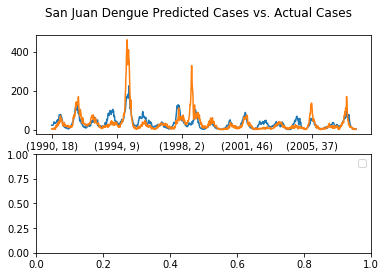

In [161]:

figs, axes = plt.subplots(nrows=2, ncols=1)

# plot sj
sj_train['fitted'] = sj_best_model.fittedvalues
sj_train.fitted.plot(ax=axes[0], label="Predictions")
sj_train.total_cases.plot(ax=axes[0], label="Actual")

# plot iq
#iq_train['fitted'] = iq_best_model.fittedvalues
#iq_train.fitted.plot(ax=axes[1], label="Predictions")
#iq_train.total_cases.plot(ax=axes[1], label="Actual")

plt.suptitle("San Juan Dengue Predicted Cases vs. Actual Cases")
plt.legend()

## Machine Learning Model for Iquitos

In [162]:
def get_best_model_two(train, test):
    # Step 1: specify the form of the model
    model_formula = "total_cases ~ 1 + " \
                    "roll_temp + " \
                    "roll_humid + " \
                    "roll_prec + " \
                    'roll_dew + ' \
                    'roll_min_temp'
    
    grid = 10 ** np.arange(-8, -3, dtype=np.float64)
                    
    best_alpha = []
    best_score = 1000
        
    # Step 2: Find the best hyper parameter, alpha
    for alpha in grid:
        model = smf.glm(formula=model_formula,
                        data=train,
                        family=sm.families.NegativeBinomial(alpha=alpha))

        results = model.fit()
        predictions = results.predict(test).astype(int)
        score = eval_measures.meanabs(predictions, test.total_cases)

        if score < best_score:
            best_alpha = alpha
            best_score = score

    print('best alpha = ', best_alpha)
    print('best score = ', best_score)
            
    # Step 3: refit on entire dataset
    full_dataset = pd.concat([train, test])
    model = smf.glm(formula=model_formula,
                    data=full_dataset,
                    family=sm.families.NegativeBinomial(alpha=best_alpha))

    fitted_model = model.fit()
    return fitted_model
    
#sj_best_model = get_best_model(sj_train_subtrain, sj_train_subtest)
iq_best_model = get_best_model_two(iq_train_subtrain, iq_train_subtest)


best alpha =  1e-08
best score =  6.625


/Users/jam/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
No handles with labels found to put in legend.


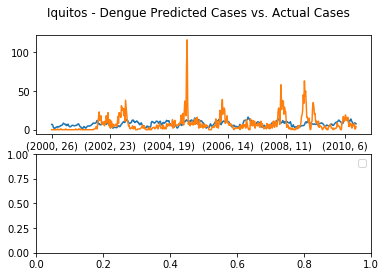

In [163]:
figs, axes = plt.subplots(nrows=2, ncols=1)

# plot sj
iq_train['fitted'] = iq_best_model.fittedvalues
iq_train.fitted.plot(ax=axes[0], label="Predictions")
iq_train.total_cases.plot(ax=axes[0], label="Actual")

# plot iq
#iq_train['fitted'] = iq_best_model.fittedvalues
#iq_train.fitted.plot(ax=axes[1], label="Predictions")
#iq_train.total_cases.plot(ax=axes[1], label="Actual")

plt.suptitle("Iquitos - Dengue Predicted Cases vs. Actual Cases")
plt.legend()